In [1]:
import jax.numpy as jnp
from jax import random

In [2]:
from jax.config import config
config.update("jax_debug_nans", True)

In [3]:
class GaussianDiffusion:
    def __init__(self, key, var_schedule):
        self.key = random.PRNGKey(key)
        self.var_schedule = var_schedule
        self.timesteps, = var_schedule.shape
    
    def diffuse(self, x, t):
        """
        Add Gaussian noise according to the variance schedule,
        at state x during timestep t.
        """
        n = x.shape[0]
        key, subkey = random.split(self.key)
        self.key = key

        # BEGIN SOLUTION
        beta_t = self.var_schedule[t]
        mean = jnp.dot(jnp.sqrt(1 - beta_t), x)
        cov = jnp.dot(beta_t, jnp.eye(n))
        gaussian_noise = random.multivariate_normal(subkey, mean, cov)
        return x + gaussian_noise
        # END SOLUTION

    def diffuse_over_time(self, x, timesteps=None):
        if timesteps is None:
            timesteps = self.timesteps
        assert timesteps <= self.timesteps, f"{timesteps} exceeds max {self.timesteps}"
        n = x.shape[0]
        states = [x]
        for t in jnp.arange(0, timesteps):
            x = self.diffuse(x, t)
            states.append(x)
        return states


In [4]:
%matplotlib ipympl
import matplotlib.pyplot as plt

def show_plots(states):
    n = len(states)
    fig, axs = plt.subplots(nrows=1, ncols=n, figsize=(9, 2))
    for i in range(n):
        axs[i].imshow(states[i])

def create_and_show(var_schedule, x, timesteps=None):
    diffusion_chain = GaussianDiffusion(0, var_schedule)
    states = diffusion_chain.diffuse_over_time(x, timesteps)
    show_plots(states)
    return states

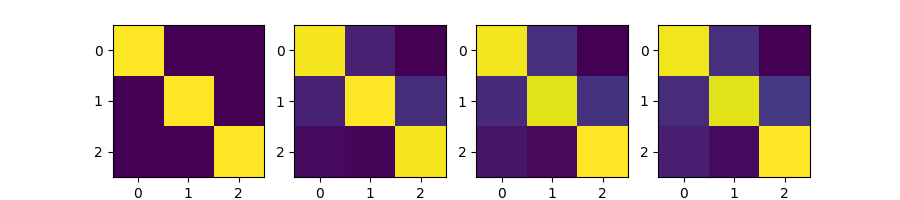

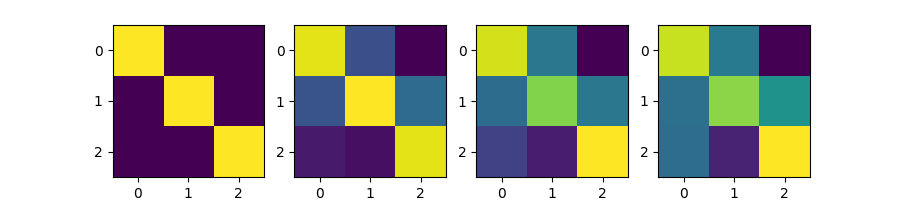

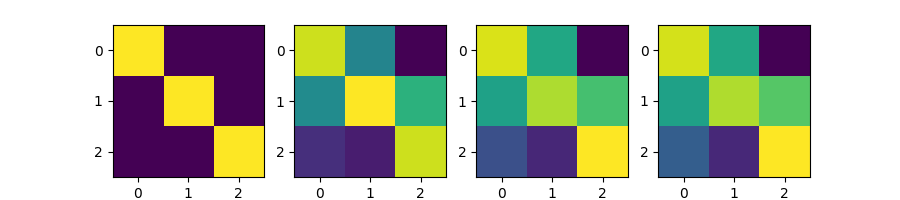

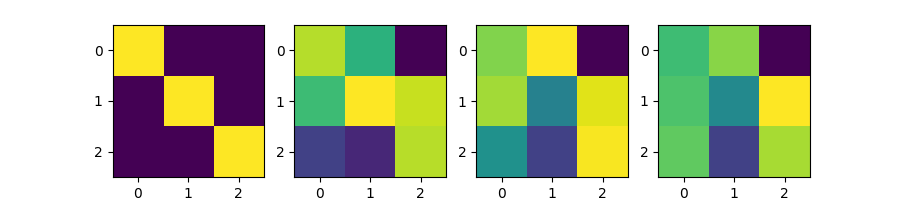

In [5]:
x = jnp.eye(3)

var_schedules = [
    jnp.array([0.01, 0.01, 0.01]),
    jnp.array([0.1, 0.2, 0.5]),
    jnp.array([0.5, 0.2, 0.1]),
    jnp.array([0.99, 0.99, 0.99]),
]

for var_schedule in var_schedules:
    create_and_show(var_schedule, x)

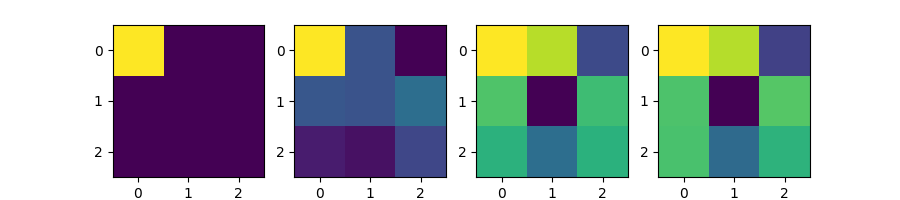

In [10]:
# BEGIN SOLUTION
x = jnp.array([
    [1.0, 0.0, 0.0],
    [0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0]])
# END SOLUTION

var_schedules = [
    # BEGIN SOLUTION
    jnp.array([0.1, 0.99, 0.1])
    # END SOLUTION
]

for var_schedule in var_schedules:
    create_and_show(var_schedule, x)